In [1]:
import pandas as pd

# Import plotting functions
import matplotlib.pyplot as plt

# Import numpy library 
import numpy as np

In [2]:
df = pd.read_csv('ku_100_M4weight.csv')

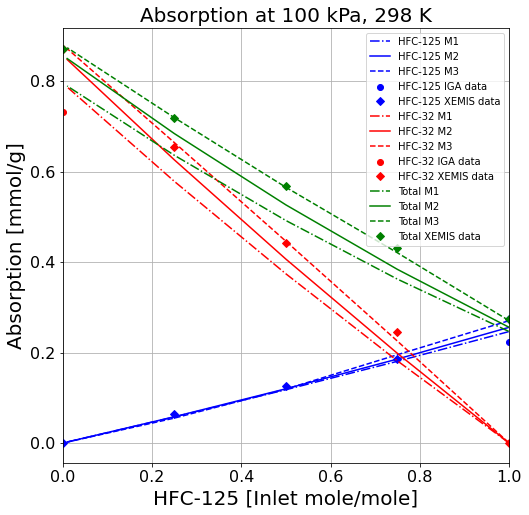

In [3]:
# IL_xe = [0.910978,0.920514854,0.938673956,0.955980518,0.972832392]
# R32_xe = [0.3405,0.2576,0.1687,0.0835,0.0001]
# R125_xe = [0,0.0221,0.0471,0.0714,0.0955]
# IL_ye = [0, 0, 0, 0, 0]
# R32_ye = [1,0.75,0.5,0.25,0]
# R125_ye = [0,0.25,0.5,0.75,1]

# 250kPa
R32_xe = [0.87125,0.65439,0.44287,0.24650,0.0]
R125_xe = [0,0.06314,0.12579,0.18559,0.27437]
R125_ye = [0,0.25,0.5,0.75,1]

IL_xi = [0.854,0.952]
R32_xi = [0.146,0.0]
R125_xi = [0,0.048]
IL_yi = [0,0]
R32_yi = [1,0]
R125_yi = [0,1]

Rtot = [sum(x) for x in zip(R32_xe, R125_xe )]

a = df['R125_x']*1000/(284*(1-df['R125_x'])+120*df['R125_x'])
a2 = df['R125_x2']*1000/(284*(1-df['R125_x2'])+120*df['R125_x2'])
a3 = df['R125_x3']*1000/(284*(1-df['R125_x3'])+120*df['R125_x3'])

b = df['R32_x']*1000/(284*(1-df['R32_x'])+52*df['R32_x'])
b2 = df['R32_x2']*1000/(284*(1-df['R32_x2'])+52*df['R32_x2'])
b3 = df['R32_x3']*1000/(284*(1-df['R32_x3'])+52*df['R32_x3'])

# 100 kPa
# ai = 0.024*1000/(284*(1-0.024)+120*0.024)
# bi = 0.076*1000/(284*(1-0.076)+52*0.076)

# 250 kPa
ai = 0.061*1000/(284*(1-0.061)+120*0.061)
bi = 0.17775*1000/(284*(1-0.17775)+52*0.17775)

# print(ai)
# print(bi)

c = a+b
c2 = a2+b2
c3 = a3+b3



fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1, 1, 1)


plt.plot(df['R125_y2'],a2,"b-.",label="HFC-125 M1") 
plt.plot(df['R125_y3'],a3,"b-",label="HFC-125 M2") 
plt.plot(df['R125_y'],a,"b--",label="HFC-125 M3") 
plt.scatter(1,ai,c="b",label="HFC-125 IGA data")
plt.plot(R125_ye,R125_xe,"bD",label="HFC-125 XEMIS data")  

 
plt.plot(df['R125_y2'],b2,"r-.",label="HFC-32 M1") 
plt.plot(df['R125_y3'],b3,"r-",label="HFC-32 M2")
plt.plot(df['R125_y'],b,"r--",label="HFC-32 M3")
plt.scatter(0,bi,c="r",label="HFC-32 IGA data")
plt.plot(R125_ye,R32_xe,"rD",label="HFC-32 XEMIS data") 


plt.plot(df['R125_y2'],c2,"g-.",label="Total M1") 
plt.plot(df['R125_y3'],c3,"g-",label="Total M2") 
plt.plot(df['R125_y'],c,"g--",label="Total M3") 
plt.plot(R125_ye,Rtot,"gD",label="Total XEMIS data")

plt.title('Absorption at 100 kPa, 298 K',fontsize=20)
plt.ylabel('Absorption [mmol/g]',fontsize=20)
plt.xlabel('HFC-125 [Inlet mole/mole]',fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid(True)
# plt.ylim(0,0.35)
plt.xlim(0,1)
plt.legend(fontsize=10)
plt.savefig('ku_plot_M4_w.png', bbox_inches='tight',dpi=300)
plt.show()